# Wine data - Linear Regression

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

## Data preprocessing

In [2]:
#df = pd.read_csv('./red_wine.csv')
df = pd.read_csv('./white_wine.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=["Total","Percent"] )
missing_data[missing_data["Total"]>0]

,Total,Percent


No missing data. Yay!

Mean shift and scale the data:

In [6]:
scaler = StandardScaler()
data = scaler.fit_transform(df)
x = data[:,:-1]
y = np.array([data[:,-1]]).T
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)
(m,n)=x_train.shape

## Training the data with TF

In [7]:
learning_rate = 0.01
training_epochs = 500

In [8]:
# define placeholders, variables, constants
X = tf.placeholder(tf.float32, [None,n])
Y = tf.placeholder(tf.float32,[None, 1])
X_test = tf.placeholder(tf.float32, [None,n])
Y_test = tf.placeholder(tf.float32,[None, 1])
w = tf.Variable(np.zeros([n,1]), name='weights', dtype=tf.float32)
#b = tf.Variable([1.], name='bias', dtype=tf.float32)

# define model
y_model = tf.matmul(X,w) #+b
# y_ = X @ w + b

# define cost
cost = tf.reduce_mean(tf.square(Y-y_model))

# select trainer and validation method
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
#RMSE = tf.reduce_mean(tf.square(Y_test- tf.matmul(X_test,w)-b))
RMSE = tf.reduce_mean(tf.square(Y_test- tf.matmul(X_test,w)))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    costs = []
    err = []
    for epoch in range(training_epochs):
        curr_cost, _ = sess.run([cost, train_op], feed_dict={X:x_train, Y: y_train})
        costs.append(curr_cost)
        err.append(sess.run(RMSE,feed_dict={X_test:x_test, Y_test: y_test}))
        if epoch % 10 == 0:
            print(epoch, ": ", curr_cost, ", ", err[-1] )
    w_val = sess.run(w)
    #b_val = sess.run(b)
    sess.close()
        
        

Instructions for updating:
Colocations handled automatically by placer.
0 :  1.0013777 ,  0.98008835
10 :  0.8880388 ,  0.8763489
20 :  0.83912915 ,  0.8274719
30 :  0.8124842 ,  0.7982605
40 :  0.79533607 ,  0.7780242
50 :  0.783207 ,  0.7629243
60 :  0.77417505 ,  0.7512276
70 :  0.7672354 ,  0.74196666
80 :  0.76178664 ,  0.73452115
90 :  0.7574353 ,  0.7284638
100 :  0.7539129 ,  0.7234871
110 :  0.7510304 ,  0.71936506
120 :  0.7486492 ,  0.7159271
130 :  0.7466677 ,  0.71304286
140 :  0.7450087 ,  0.7106106
150 :  0.74361265 ,  0.7085506
160 :  0.7424331 ,  0.7067992
170 :  0.7414327 ,  0.70530456
180 :  0.7405812 ,  0.704025
190 :  0.7398545 ,  0.702926
200 :  0.73923254 ,  0.7019788
210 :  0.7386986 ,  0.70116085
220 :  0.7382399 ,  0.70045155
230 :  0.73784333 ,  0.6998348
240 :  0.73750055 ,  0.6992975
250 :  0.7372031 ,  0.6988274
260 :  0.73694396 ,  0.6984144
270 :  0.7367176 ,  0.69805104
280 :  0.736519 ,  0.6977299
290 :  0.7363442 ,  0.6974451
300 :  0.73618925 ,  0.69

In [9]:
y_pred=np.matmul(x_test,w_val)#+b_val
y_pred

array([[-0.04322087],
       [ 0.13283141],
       [ 0.01439009],
       ...,
       [ 0.8540846 ],
       [-0.84847112],
       [ 0.03846214]])

In [10]:
y_test

array([[-0.99137392],
       [ 0.13787014],
       [-2.12061798],
       ...,
       [ 0.13787014],
       [ 0.13787014],
       [ 0.13787014]])

## Misc

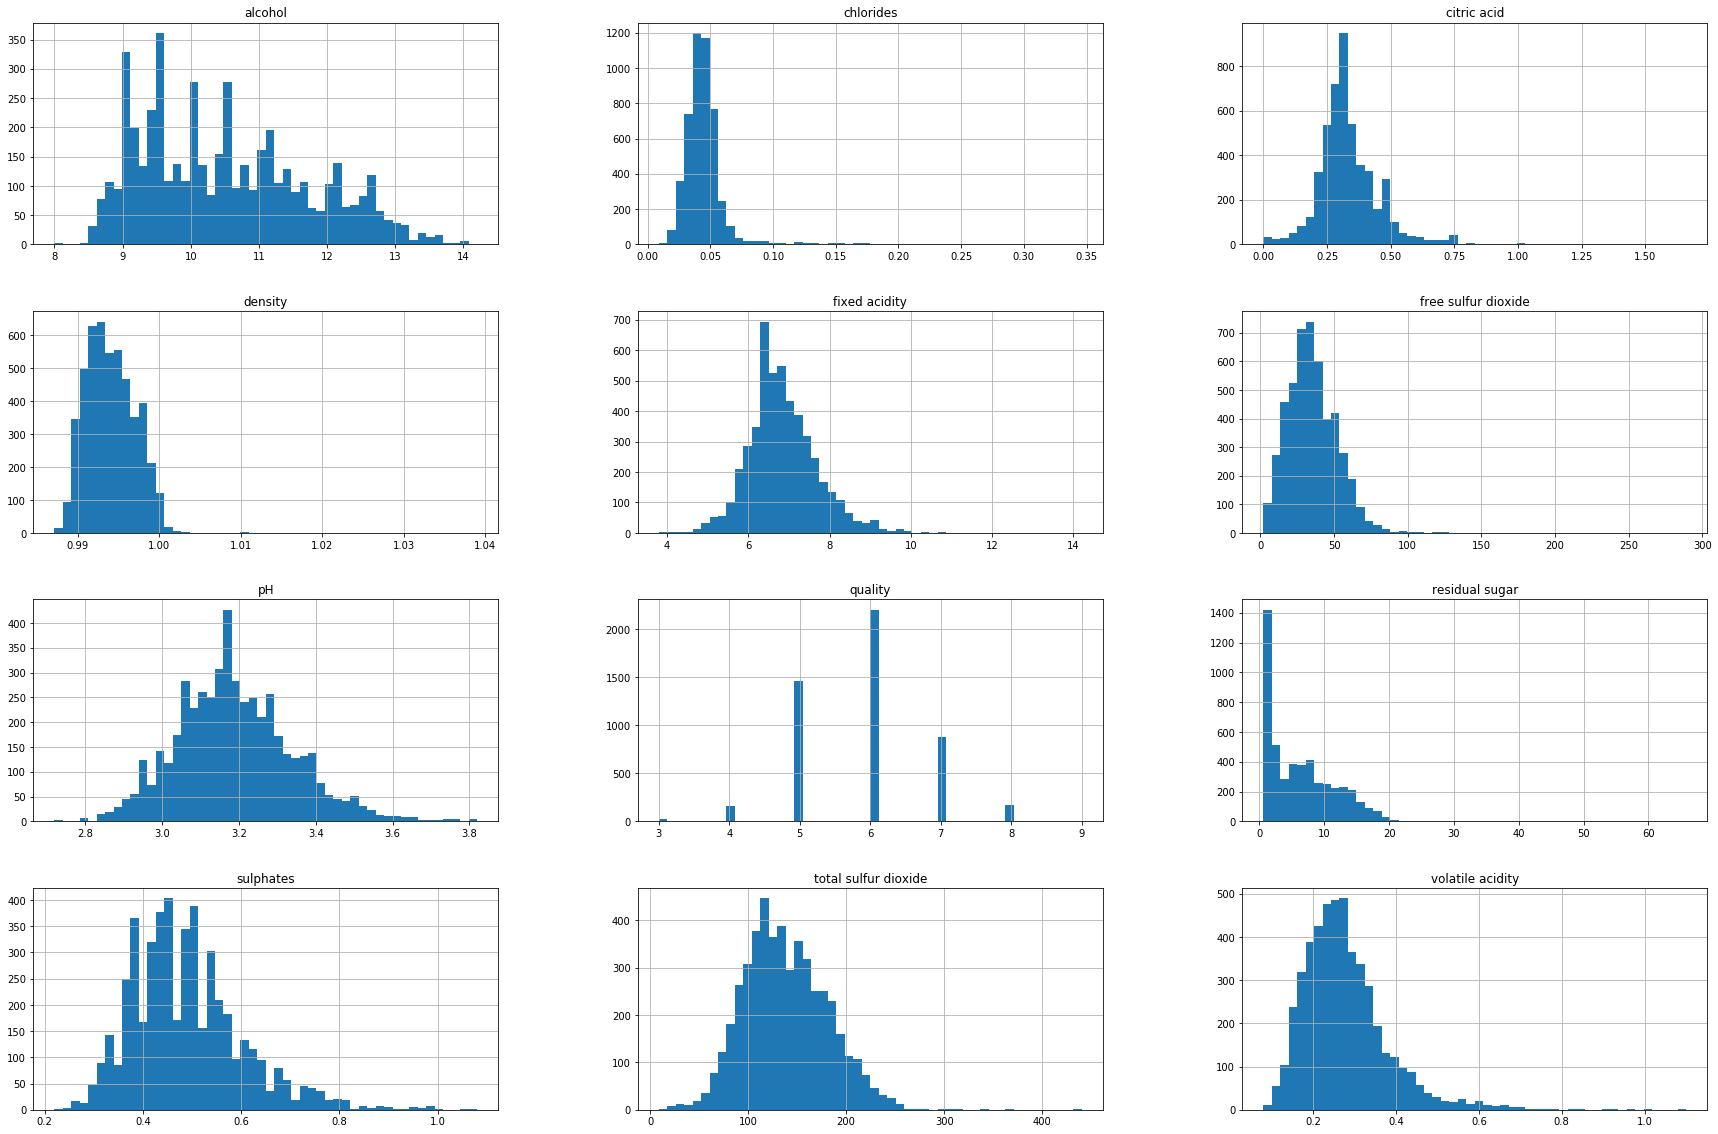

In [11]:
df.hist(bins=50, figsize=(30,20));

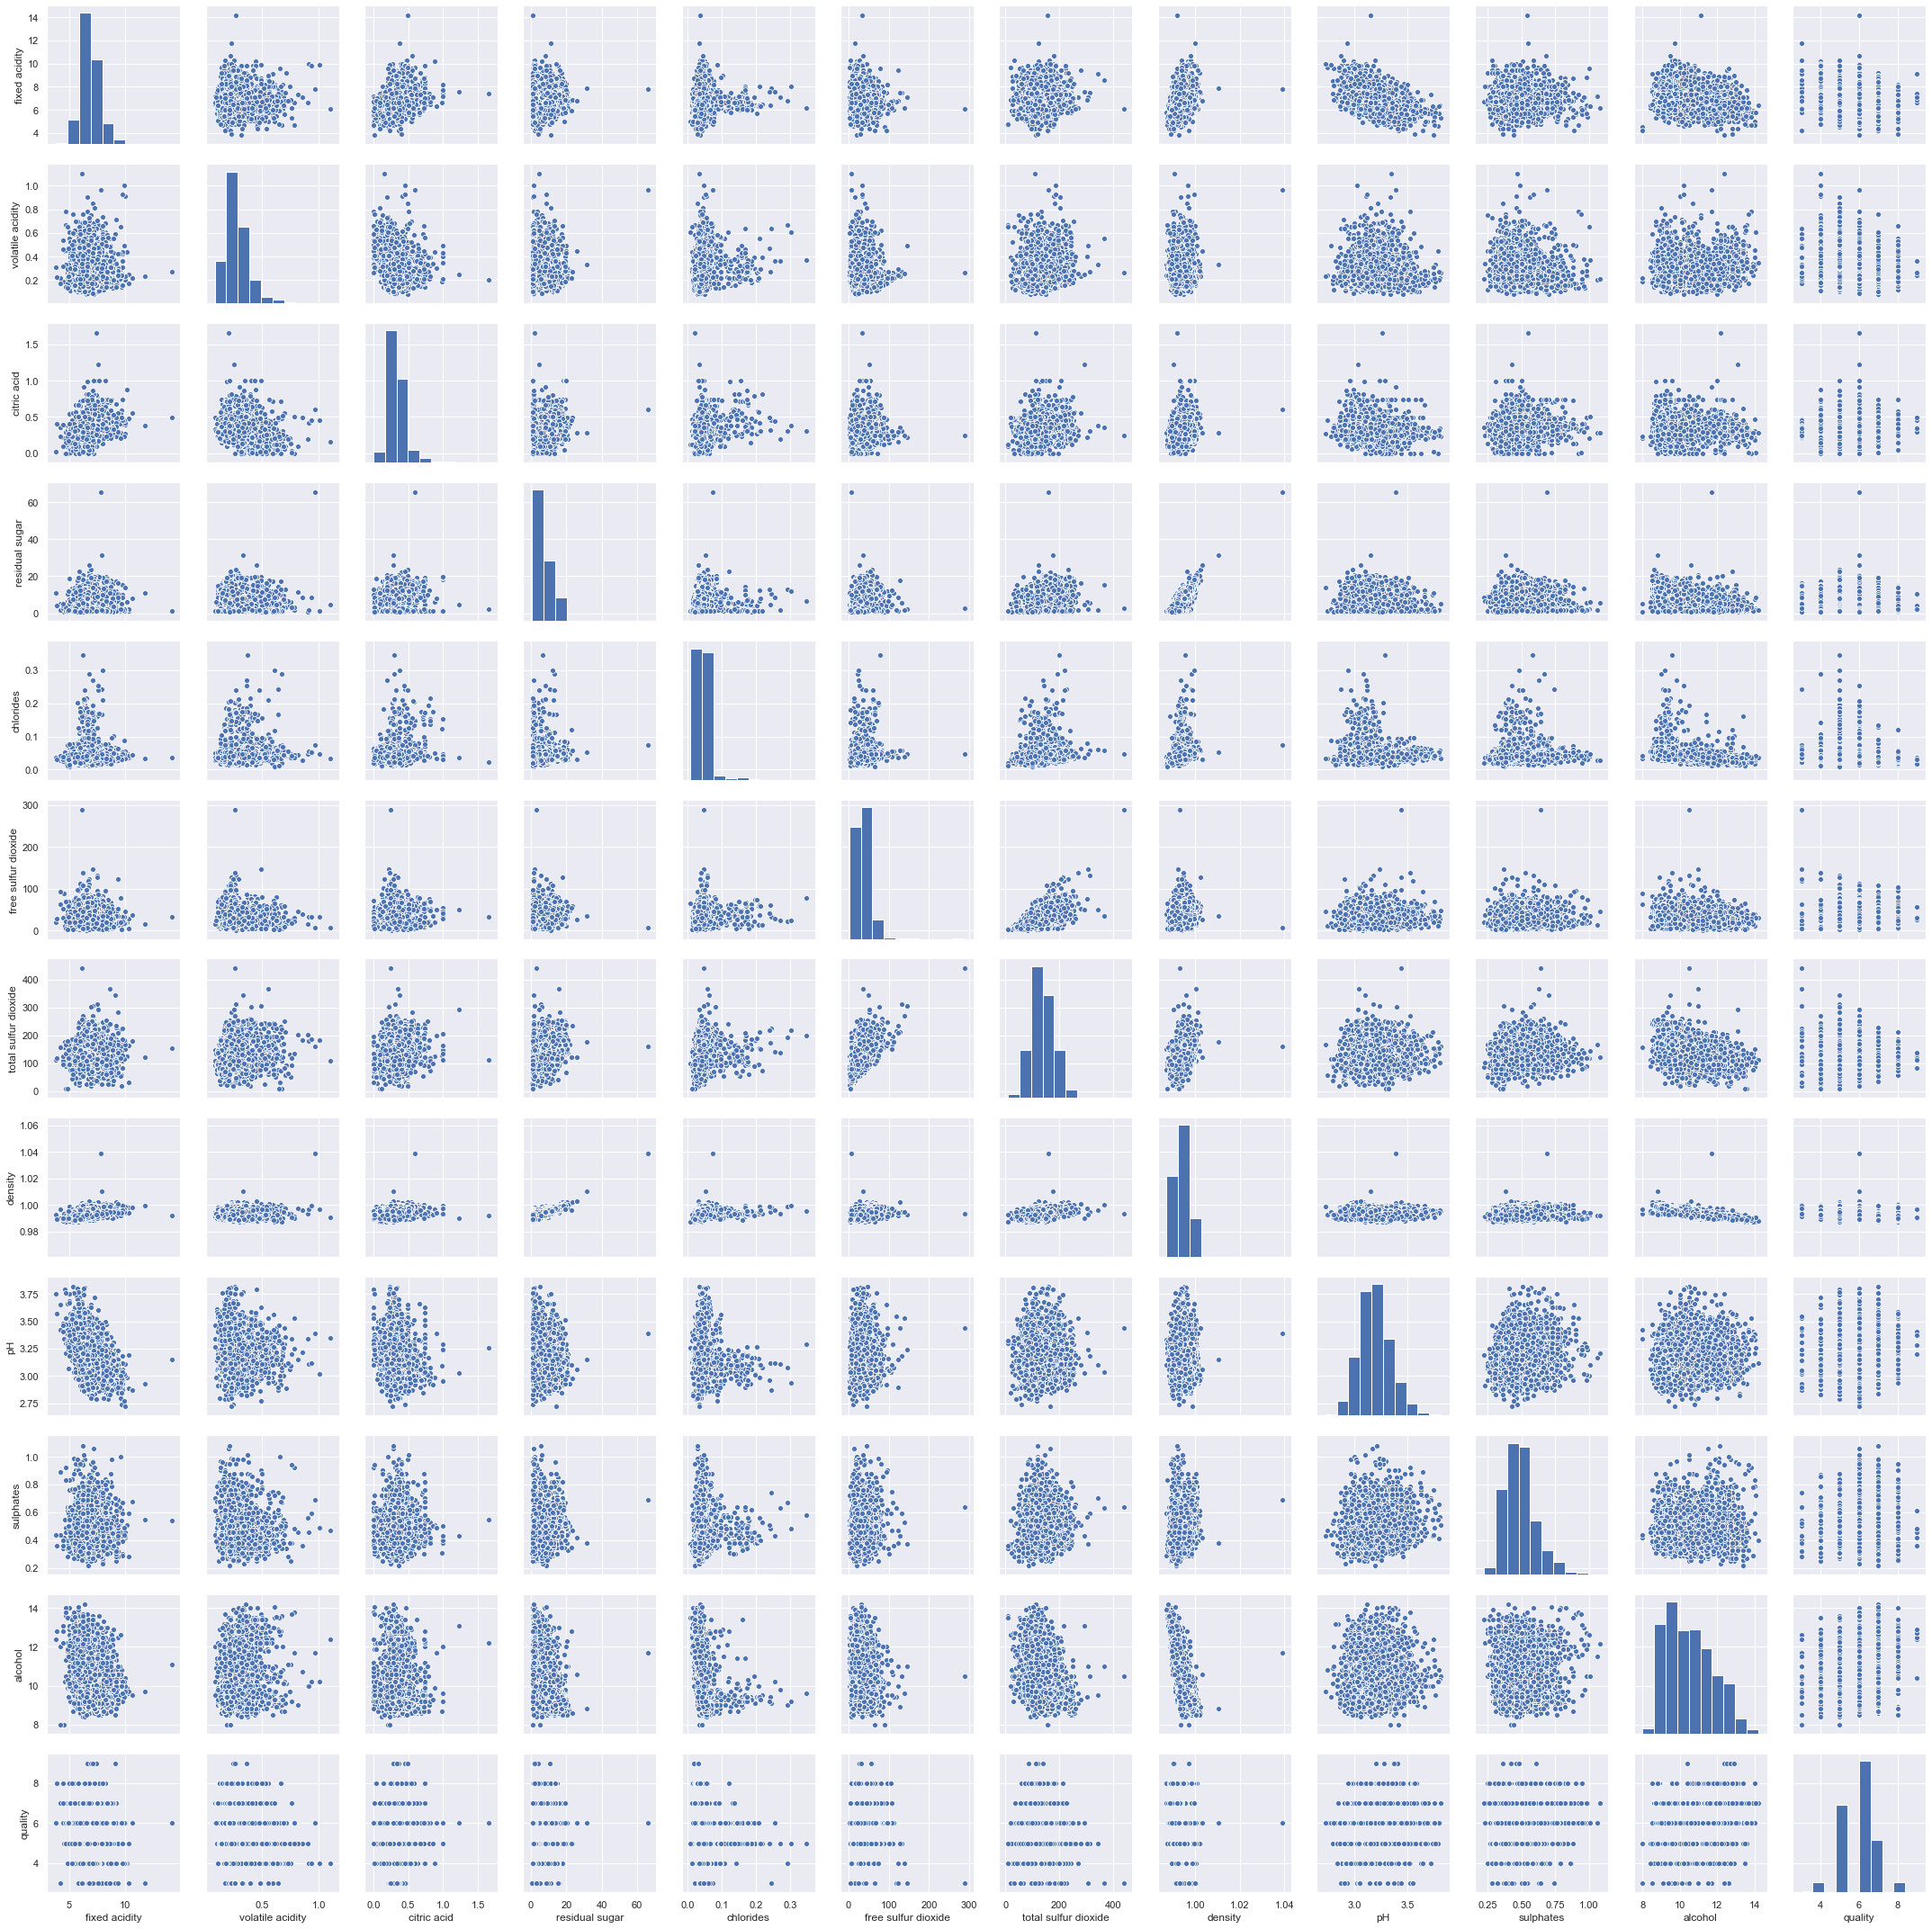

In [12]:
sns.set()
sns.pairplot(df, height = 2.5)
plt.show()

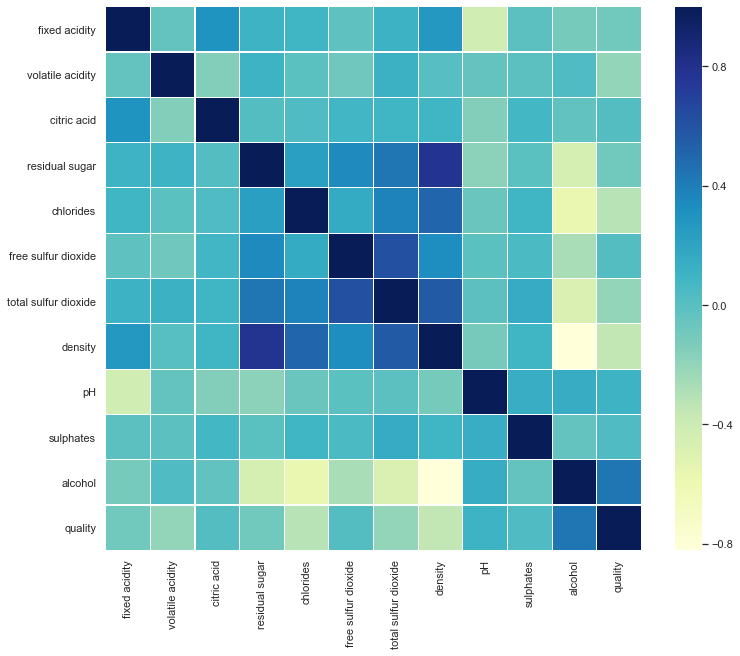

In [13]:
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

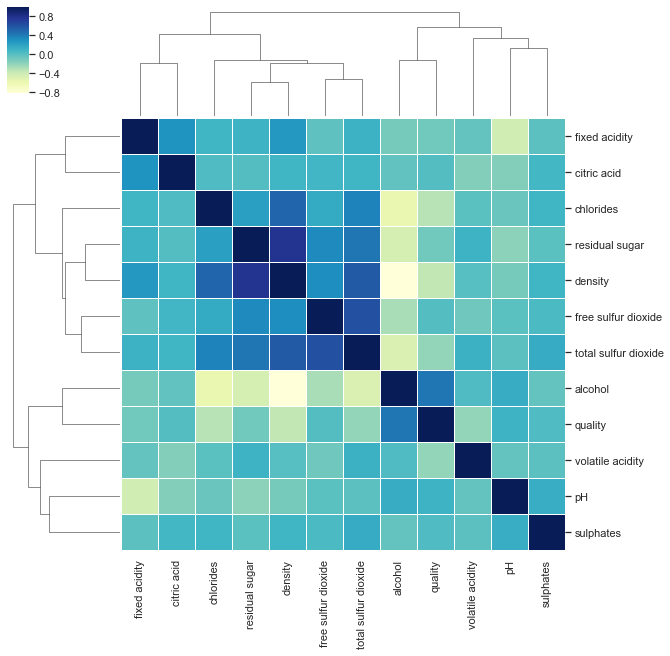

In [14]:
#correlation matrix
corrmat = df.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

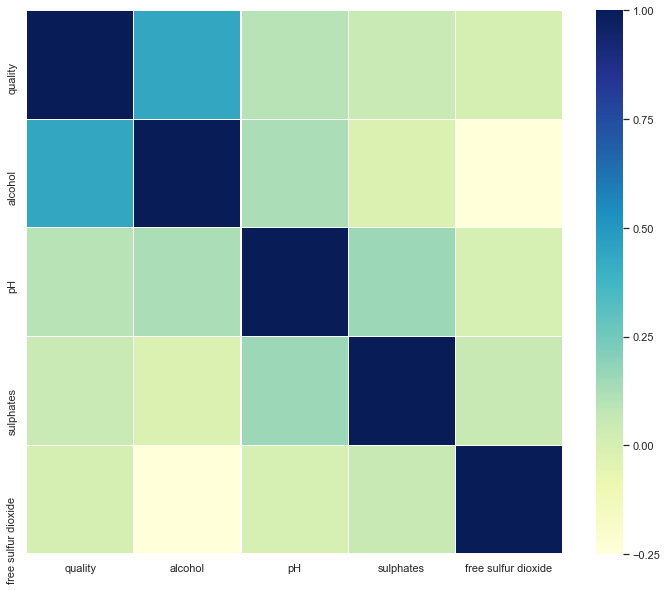

In [15]:
#saleprice correlation matrix
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)